In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# Ejemplo de una Red Convolucional:
1. Preprocesamiento de los datos
2. Creación del data set en memoria
3. Definición de X & y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DIRECTORIO = "flowers-recognition/flowers"
CATEGORIAS = ["dandelion", "rose"]


.\flowers-recognition/flowers\dandelion
[[ 5  5  4 ... 35 34 33]
 [ 5  4  4 ... 36 35 34]
 [ 5  5  4 ... 36 35 34]
 ...
 [16 16 17 ... 21 21 22]
 [17 17 17 ... 21 22 22]
 [17 17 17 ... 22 22 22]]


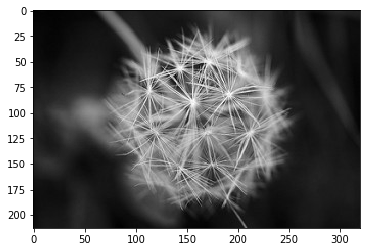

In [3]:
for cat in CATEGORIAS:
    ruta = os.path.join(".",DIRECTORIO,cat)
    print(ruta)
    for img in os.listdir(ruta):
        imgToArray = cv2.imread(os.path.join(ruta, img), cv2.IMREAD_GRAYSCALE)
        print(imgToArray)
        plt.imshow(imgToArray, cmap='gray')
        plt.show()
        break;
    break;
    

In [4]:
datos_entrenamiento = []
IMG_SIZE = 70
def crea_datos_entrenamiento():
    for categoria in CATEGORIAS:
        path = os.path.join(DIRECTORIO,categoria)  #
        class_num = CATEGORIAS.index(categoria)  # Clasificación: 0 Dandelion, 1 Rose
        print(class_num)
        for img in os.listdir(path):  # Iterar cada imagen
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # Convertir a arreglo
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Cambiar el tamaño de cada imagen
                datos_entrenamiento.append([new_array, class_num])  # Agregar a datos
            except Exception as e:
                pass
 
crea_datos_entrenamiento()

0
1


In [5]:
print(len(datos_entrenamiento))

1836


# Guardar datos de imágenes: en matrices

In [6]:
import pickle
X=[]
y=[]
import random
random.shuffle(datos_entrenamiento)
for m, clase in datos_entrenamiento:
    X.append(m)
    y.append(clase)

# Creación del modelo

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

C:\Users\Paty\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
X =np.array(X)
X= X/255
X = X.reshape(-1,70,70,1)
X

array([[[[0.09019608],
         [0.03529412],
         [0.01960784],
         ...,
         [0.11372549],
         [0.11372549],
         [0.15294118]],

        [[0.09803922],
         [0.03137255],
         [0.02745098],
         ...,
         [0.09411765],
         [0.08235294],
         [0.09411765]],

        [[0.08627451],
         [0.02745098],
         [0.01960784],
         ...,
         [0.08235294],
         [0.0627451 ],
         [0.0627451 ]],

        ...,

        [[0.04313725],
         [0.03529412],
         [0.05098039],
         ...,
         [0.03137255],
         [0.05098039],
         [0.03921569]],

        [[0.05882353],
         [0.04705882],
         [0.05098039],
         ...,
         [0.03137255],
         [0.0627451 ],
         [0.04313725]],

        [[0.05098039],
         [0.05098039],
         [0.03921569],
         ...,
         [0.05098039],
         [0.03529412],
         [0.0627451 ]]],


       [[[0.41960784],
         [0.41568627],
         [0.42

In [9]:
modelo = Sequential()
modelo.add(Conv2D(32,(3,3), input_shape=X.shape[1:]))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dense(1))
modelo.add(Activation('sigmoid'))

In [10]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 68, 68, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 36993     
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________


In [11]:
modelo.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
modelo.fit(X, y, batch_size=32, epochs=50, validation_split=.25)

Train on 1377 samples, validate on 459 samples
Epoch 1/50
1377/1377 [==============================] - ETA: 38s - loss: 0.7188 - acc: 0.28 - ETA: 22s - loss: 0.7937 - acc: 0.42 - ETA: 16s - loss: 0.7881 - acc: 0.47 - ETA: 13s - loss: 0.7665 - acc: 0.49 - ETA: 12s - loss: 0.7493 - acc: 0.53 - ETA: 10s - loss: 0.7375 - acc: 0.53 - ETA: 9s - loss: 0.7304 - acc: 0.5402 - ETA: 9s - loss: 0.7241 - acc: 0.543 - ETA: 8s - loss: 0.7228 - acc: 0.531 - ETA: 7s - loss: 0.7152 - acc: 0.540 - ETA: 7s - loss: 0.7103 - acc: 0.548 - ETA: 7s - loss: 0.7080 - acc: 0.546 - ETA: 6s - loss: 0.7063 - acc: 0.548 - ETA: 6s - loss: 0.7030 - acc: 0.551 - ETA: 6s - loss: 0.7026 - acc: 0.547 - ETA: 5s - loss: 0.6985 - acc: 0.556 - ETA: 5s - loss: 0.6966 - acc: 0.562 - ETA: 5s - loss: 0.6975 - acc: 0.559 - ETA: 4s - loss: 0.6959 - acc: 0.564 - ETA: 4s - loss: 0.6955 - acc: 0.560 - ETA: 4s - loss: 0.6930 - acc: 0.562 - ETA: 4s - loss: 0.6908 - acc: 0.563 - ETA: 3s - loss: 0.6861 - acc: 0.570 - ETA: 3s - loss: 0.6848

1377/1377 [==============================] - ETA: 7s - loss: 0.4848 - acc: 0.812 - ETA: 8s - loss: 0.4852 - acc: 0.812 - ETA: 7s - loss: 0.4899 - acc: 0.791 - ETA: 7s - loss: 0.5076 - acc: 0.765 - ETA: 7s - loss: 0.5148 - acc: 0.756 - ETA: 6s - loss: 0.5129 - acc: 0.770 - ETA: 6s - loss: 0.5242 - acc: 0.754 - ETA: 6s - loss: 0.5267 - acc: 0.750 - ETA: 6s - loss: 0.5294 - acc: 0.750 - ETA: 6s - loss: 0.5300 - acc: 0.759 - ETA: 5s - loss: 0.5277 - acc: 0.764 - ETA: 5s - loss: 0.5250 - acc: 0.770 - ETA: 5s - loss: 0.5255 - acc: 0.766 - ETA: 5s - loss: 0.5248 - acc: 0.763 - ETA: 5s - loss: 0.5195 - acc: 0.764 - ETA: 4s - loss: 0.5312 - acc: 0.748 - ETA: 4s - loss: 0.5272 - acc: 0.753 - ETA: 4s - loss: 0.5254 - acc: 0.755 - ETA: 4s - loss: 0.5217 - acc: 0.756 - ETA: 4s - loss: 0.5183 - acc: 0.762 - ETA: 3s - loss: 0.5163 - acc: 0.764 - ETA: 3s - loss: 0.5134 - acc: 0.767 - ETA: 3s - loss: 0.5111 - acc: 0.770 - ETA: 3s - loss: 0.5104 - acc: 0.769 - ETA: 3s - loss: 0.5065 - acc: 0.772 - ETA: 

1377/1377 [==============================] - ETA: 7s - loss: 0.4380 - acc: 0.812 - ETA: 7s - loss: 0.3994 - acc: 0.875 - ETA: 7s - loss: 0.3897 - acc: 0.864 - ETA: 6s - loss: 0.3782 - acc: 0.875 - ETA: 6s - loss: 0.3663 - acc: 0.881 - ETA: 6s - loss: 0.3710 - acc: 0.875 - ETA: 6s - loss: 0.3703 - acc: 0.879 - ETA: 6s - loss: 0.3758 - acc: 0.867 - ETA: 5s - loss: 0.3796 - acc: 0.861 - ETA: 5s - loss: 0.3827 - acc: 0.862 - ETA: 5s - loss: 0.3849 - acc: 0.858 - ETA: 5s - loss: 0.3828 - acc: 0.859 - ETA: 5s - loss: 0.3862 - acc: 0.863 - ETA: 4s - loss: 0.3806 - acc: 0.863 - ETA: 4s - loss: 0.3802 - acc: 0.862 - ETA: 4s - loss: 0.3844 - acc: 0.855 - ETA: 4s - loss: 0.3848 - acc: 0.854 - ETA: 4s - loss: 0.3847 - acc: 0.857 - ETA: 4s - loss: 0.3805 - acc: 0.861 - ETA: 3s - loss: 0.3822 - acc: 0.862 - ETA: 3s - loss: 0.3841 - acc: 0.857 - ETA: 3s - loss: 0.3849 - acc: 0.855 - ETA: 3s - loss: 0.3836 - acc: 0.853 - ETA: 3s - loss: 0.3815 - acc: 0.854 - ETA: 3s - loss: 0.3812 - acc: 0.856 - ETA: 

1377/1377 [==============================] - ETA: 6s - loss: 0.2872 - acc: 0.937 - ETA: 6s - loss: 0.3143 - acc: 0.890 - ETA: 6s - loss: 0.3558 - acc: 0.843 - ETA: 6s - loss: 0.3327 - acc: 0.859 - ETA: 6s - loss: 0.3374 - acc: 0.856 - ETA: 6s - loss: 0.3293 - acc: 0.854 - ETA: 5s - loss: 0.3489 - acc: 0.830 - ETA: 5s - loss: 0.3430 - acc: 0.839 - ETA: 5s - loss: 0.3358 - acc: 0.854 - ETA: 5s - loss: 0.3252 - acc: 0.868 - ETA: 5s - loss: 0.3233 - acc: 0.877 - ETA: 5s - loss: 0.3202 - acc: 0.880 - ETA: 5s - loss: 0.3219 - acc: 0.879 - ETA: 4s - loss: 0.3175 - acc: 0.886 - ETA: 4s - loss: 0.3152 - acc: 0.889 - ETA: 4s - loss: 0.3143 - acc: 0.894 - ETA: 4s - loss: 0.3113 - acc: 0.898 - ETA: 4s - loss: 0.3070 - acc: 0.904 - ETA: 3s - loss: 0.3052 - acc: 0.906 - ETA: 3s - loss: 0.3013 - acc: 0.909 - ETA: 3s - loss: 0.3003 - acc: 0.907 - ETA: 3s - loss: 0.2975 - acc: 0.909 - ETA: 3s - loss: 0.2959 - acc: 0.911 - ETA: 3s - loss: 0.2948 - acc: 0.912 - ETA: 3s - loss: 0.2939 - acc: 0.911 - ETA: 

1377/1377 [==============================] - ETA: 6s - loss: 0.1772 - acc: 0.968 - ETA: 6s - loss: 0.2704 - acc: 0.890 - ETA: 6s - loss: 0.2263 - acc: 0.927 - ETA: 6s - loss: 0.2342 - acc: 0.921 - ETA: 6s - loss: 0.2401 - acc: 0.925 - ETA: 6s - loss: 0.2408 - acc: 0.916 - ETA: 5s - loss: 0.2453 - acc: 0.910 - ETA: 5s - loss: 0.2346 - acc: 0.918 - ETA: 5s - loss: 0.2265 - acc: 0.923 - ETA: 5s - loss: 0.2341 - acc: 0.925 - ETA: 5s - loss: 0.2285 - acc: 0.931 - ETA: 5s - loss: 0.2282 - acc: 0.932 - ETA: 4s - loss: 0.2289 - acc: 0.932 - ETA: 4s - loss: 0.2253 - acc: 0.935 - ETA: 4s - loss: 0.2195 - acc: 0.939 - ETA: 4s - loss: 0.2257 - acc: 0.937 - ETA: 4s - loss: 0.2217 - acc: 0.941 - ETA: 4s - loss: 0.2204 - acc: 0.944 - ETA: 4s - loss: 0.2183 - acc: 0.945 - ETA: 3s - loss: 0.2180 - acc: 0.946 - ETA: 3s - loss: 0.2201 - acc: 0.943 - ETA: 3s - loss: 0.2188 - acc: 0.944 - ETA: 3s - loss: 0.2187 - acc: 0.945 - ETA: 3s - loss: 0.2169 - acc: 0.946 - ETA: 3s - loss: 0.2179 - acc: 0.945 - ETA: 

1377/1377 [==============================] - ETA: 7s - loss: 0.2070 - acc: 0.937 - ETA: 6s - loss: 0.1792 - acc: 0.953 - ETA: 6s - loss: 0.1836 - acc: 0.947 - ETA: 6s - loss: 0.1835 - acc: 0.960 - ETA: 6s - loss: 0.1803 - acc: 0.968 - ETA: 6s - loss: 0.1771 - acc: 0.968 - ETA: 6s - loss: 0.1768 - acc: 0.973 - ETA: 5s - loss: 0.1795 - acc: 0.968 - ETA: 5s - loss: 0.1721 - acc: 0.972 - ETA: 5s - loss: 0.1680 - acc: 0.975 - ETA: 5s - loss: 0.1659 - acc: 0.974 - ETA: 5s - loss: 0.1642 - acc: 0.974 - ETA: 5s - loss: 0.1626 - acc: 0.971 - ETA: 4s - loss: 0.1616 - acc: 0.971 - ETA: 4s - loss: 0.1619 - acc: 0.972 - ETA: 4s - loss: 0.1641 - acc: 0.970 - ETA: 4s - loss: 0.1649 - acc: 0.970 - ETA: 4s - loss: 0.1676 - acc: 0.968 - ETA: 4s - loss: 0.1701 - acc: 0.965 - ETA: 3s - loss: 0.1707 - acc: 0.967 - ETA: 3s - loss: 0.1697 - acc: 0.967 - ETA: 3s - loss: 0.1714 - acc: 0.967 - ETA: 3s - loss: 0.1734 - acc: 0.967 - ETA: 3s - loss: 0.1727 - acc: 0.966 - ETA: 3s - loss: 0.1717 - acc: 0.967 - ETA: 

1377/1377 [==============================] - ETA: 7s - loss: 0.1055 - acc: 1.000 - ETA: 6s - loss: 0.1153 - acc: 1.000 - ETA: 6s - loss: 0.1203 - acc: 0.989 - ETA: 6s - loss: 0.1194 - acc: 0.984 - ETA: 6s - loss: 0.1290 - acc: 0.987 - ETA: 6s - loss: 0.1270 - acc: 0.989 - ETA: 6s - loss: 0.1236 - acc: 0.991 - ETA: 5s - loss: 0.1191 - acc: 0.992 - ETA: 5s - loss: 0.1258 - acc: 0.986 - ETA: 5s - loss: 0.1244 - acc: 0.984 - ETA: 5s - loss: 0.1224 - acc: 0.985 - ETA: 5s - loss: 0.1224 - acc: 0.987 - ETA: 5s - loss: 0.1199 - acc: 0.988 - ETA: 4s - loss: 0.1189 - acc: 0.988 - ETA: 4s - loss: 0.1197 - acc: 0.987 - ETA: 4s - loss: 0.1205 - acc: 0.986 - ETA: 4s - loss: 0.1198 - acc: 0.985 - ETA: 4s - loss: 0.1209 - acc: 0.984 - ETA: 4s - loss: 0.1208 - acc: 0.983 - ETA: 3s - loss: 0.1216 - acc: 0.982 - ETA: 3s - loss: 0.1220 - acc: 0.982 - ETA: 3s - loss: 0.1211 - acc: 0.983 - ETA: 3s - loss: 0.1218 - acc: 0.983 - ETA: 3s - loss: 0.1242 - acc: 0.984 - ETA: 3s - loss: 0.1241 - acc: 0.985 - ETA: 

1377/1377 [==============================] - ETA: 6s - loss: 0.0709 - acc: 1.000 - ETA: 6s - loss: 0.0770 - acc: 1.000 - ETA: 6s - loss: 0.1139 - acc: 0.979 - ETA: 6s - loss: 0.1517 - acc: 0.945 - ETA: 6s - loss: 0.1386 - acc: 0.956 - ETA: 6s - loss: 0.1364 - acc: 0.963 - ETA: 6s - loss: 0.1393 - acc: 0.964 - ETA: 5s - loss: 0.1599 - acc: 0.949 - ETA: 5s - loss: 0.1635 - acc: 0.937 - ETA: 5s - loss: 0.1776 - acc: 0.937 - ETA: 5s - loss: 0.1749 - acc: 0.940 - ETA: 5s - loss: 0.1729 - acc: 0.940 - ETA: 5s - loss: 0.1684 - acc: 0.944 - ETA: 5s - loss: 0.1608 - acc: 0.948 - ETA: 4s - loss: 0.1594 - acc: 0.950 - ETA: 4s - loss: 0.1645 - acc: 0.947 - ETA: 4s - loss: 0.1632 - acc: 0.948 - ETA: 4s - loss: 0.1698 - acc: 0.947 - ETA: 4s - loss: 0.1678 - acc: 0.949 - ETA: 3s - loss: 0.1678 - acc: 0.948 - ETA: 3s - loss: 0.1631 - acc: 0.950 - ETA: 3s - loss: 0.1612 - acc: 0.953 - ETA: 3s - loss: 0.1595 - acc: 0.955 - ETA: 3s - loss: 0.1582 - acc: 0.955 - ETA: 3s - loss: 0.1580 - acc: 0.955 - ETA: 

1377/1377 [==============================] - ETA: 7s - loss: 0.0699 - acc: 1.000 - ETA: 7s - loss: 0.0721 - acc: 1.000 - ETA: 6s - loss: 0.0834 - acc: 0.989 - ETA: 6s - loss: 0.0869 - acc: 0.984 - ETA: 6s - loss: 0.0850 - acc: 0.987 - ETA: 6s - loss: 0.0890 - acc: 0.984 - ETA: 6s - loss: 0.0819 - acc: 0.986 - ETA: 5s - loss: 0.0805 - acc: 0.988 - ETA: 5s - loss: 0.0776 - acc: 0.989 - ETA: 5s - loss: 0.0801 - acc: 0.990 - ETA: 5s - loss: 0.0776 - acc: 0.991 - ETA: 5s - loss: 0.0791 - acc: 0.992 - ETA: 5s - loss: 0.0788 - acc: 0.992 - ETA: 4s - loss: 0.0771 - acc: 0.993 - ETA: 4s - loss: 0.0771 - acc: 0.993 - ETA: 4s - loss: 0.0804 - acc: 0.992 - ETA: 4s - loss: 0.0815 - acc: 0.990 - ETA: 4s - loss: 0.0810 - acc: 0.991 - ETA: 4s - loss: 0.0809 - acc: 0.991 - ETA: 3s - loss: 0.0823 - acc: 0.990 - ETA: 3s - loss: 0.0827 - acc: 0.989 - ETA: 3s - loss: 0.0821 - acc: 0.990 - ETA: 3s - loss: 0.0817 - acc: 0.990 - ETA: 3s - loss: 0.0820 - acc: 0.990 - ETA: 3s - loss: 0.0812 - acc: 0.991 - ETA: 

1377/1377 [==============================] - ETA: 6s - loss: 0.0742 - acc: 1.000 - ETA: 6s - loss: 0.0666 - acc: 1.000 - ETA: 6s - loss: 0.0780 - acc: 0.989 - ETA: 6s - loss: 0.0770 - acc: 0.992 - ETA: 6s - loss: 0.0752 - acc: 0.993 - ETA: 6s - loss: 0.0729 - acc: 0.994 - ETA: 5s - loss: 0.0713 - acc: 0.995 - ETA: 5s - loss: 0.0706 - acc: 0.996 - ETA: 5s - loss: 0.0671 - acc: 0.996 - ETA: 5s - loss: 0.0642 - acc: 0.996 - ETA: 5s - loss: 0.0703 - acc: 0.994 - ETA: 5s - loss: 0.0695 - acc: 0.994 - ETA: 4s - loss: 0.0682 - acc: 0.995 - ETA: 4s - loss: 0.0667 - acc: 0.995 - ETA: 4s - loss: 0.0688 - acc: 0.995 - ETA: 4s - loss: 0.0682 - acc: 0.996 - ETA: 4s - loss: 0.0670 - acc: 0.996 - ETA: 4s - loss: 0.0660 - acc: 0.996 - ETA: 3s - loss: 0.0663 - acc: 0.996 - ETA: 3s - loss: 0.0666 - acc: 0.996 - ETA: 3s - loss: 0.0663 - acc: 0.997 - ETA: 3s - loss: 0.0673 - acc: 0.995 - ETA: 3s - loss: 0.0664 - acc: 0.995 - ETA: 3s - loss: 0.0657 - acc: 0.996 - ETA: 2s - loss: 0.0649 - acc: 0.996 - ETA: 

1377/1377 [==============================] - ETA: 6s - loss: 0.0320 - acc: 1.000 - ETA: 6s - loss: 0.0565 - acc: 0.984 - ETA: 6s - loss: 0.0524 - acc: 0.989 - ETA: 6s - loss: 0.0484 - acc: 0.992 - ETA: 6s - loss: 0.0517 - acc: 0.993 - ETA: 6s - loss: 0.0489 - acc: 0.994 - ETA: 6s - loss: 0.0528 - acc: 0.995 - ETA: 5s - loss: 0.0513 - acc: 0.996 - ETA: 5s - loss: 0.0493 - acc: 0.996 - ETA: 5s - loss: 0.0482 - acc: 0.996 - ETA: 5s - loss: 0.0472 - acc: 0.997 - ETA: 5s - loss: 0.0470 - acc: 0.997 - ETA: 5s - loss: 0.0458 - acc: 0.997 - ETA: 4s - loss: 0.0455 - acc: 0.997 - ETA: 4s - loss: 0.0455 - acc: 0.997 - ETA: 4s - loss: 0.0467 - acc: 0.998 - ETA: 4s - loss: 0.0465 - acc: 0.998 - ETA: 4s - loss: 0.0458 - acc: 0.998 - ETA: 4s - loss: 0.0454 - acc: 0.998 - ETA: 3s - loss: 0.0463 - acc: 0.998 - ETA: 3s - loss: 0.0470 - acc: 0.998 - ETA: 3s - loss: 0.0462 - acc: 0.998 - ETA: 3s - loss: 0.0461 - acc: 0.998 - ETA: 3s - loss: 0.0470 - acc: 0.998 - ETA: 3s - loss: 0.0466 - acc: 0.998 - ETA: 

1377/1377 [==============================] - ETA: 7s - loss: 0.0256 - acc: 1.000 - ETA: 7s - loss: 0.0505 - acc: 1.000 - ETA: 7s - loss: 0.0472 - acc: 1.000 - ETA: 6s - loss: 0.0410 - acc: 1.000 - ETA: 6s - loss: 0.0449 - acc: 0.993 - ETA: 6s - loss: 0.0454 - acc: 0.994 - ETA: 6s - loss: 0.0422 - acc: 0.995 - ETA: 6s - loss: 0.0418 - acc: 0.996 - ETA: 6s - loss: 0.0408 - acc: 0.996 - ETA: 5s - loss: 0.0424 - acc: 0.993 - ETA: 5s - loss: 0.0416 - acc: 0.994 - ETA: 5s - loss: 0.0410 - acc: 0.994 - ETA: 5s - loss: 0.0410 - acc: 0.995 - ETA: 5s - loss: 0.0411 - acc: 0.995 - ETA: 5s - loss: 0.0412 - acc: 0.995 - ETA: 4s - loss: 0.0411 - acc: 0.996 - ETA: 4s - loss: 0.0409 - acc: 0.996 - ETA: 4s - loss: 0.0418 - acc: 0.996 - ETA: 4s - loss: 0.0421 - acc: 0.996 - ETA: 4s - loss: 0.0424 - acc: 0.996 - ETA: 4s - loss: 0.0421 - acc: 0.997 - ETA: 3s - loss: 0.0432 - acc: 0.995 - ETA: 3s - loss: 0.0429 - acc: 0.995 - ETA: 3s - loss: 0.0422 - acc: 0.996 - ETA: 3s - loss: 0.0421 - acc: 0.996 - ETA: 

1377/1377 [==============================] - ETA: 6s - loss: 0.0318 - acc: 1.000 - ETA: 6s - loss: 0.0292 - acc: 1.000 - ETA: 6s - loss: 0.0321 - acc: 1.000 - ETA: 6s - loss: 0.0357 - acc: 1.000 - ETA: 6s - loss: 0.0373 - acc: 1.000 - ETA: 6s - loss: 0.0371 - acc: 1.000 - ETA: 6s - loss: 0.0359 - acc: 1.000 - ETA: 5s - loss: 0.0349 - acc: 1.000 - ETA: 5s - loss: 0.0344 - acc: 1.000 - ETA: 5s - loss: 0.0333 - acc: 1.000 - ETA: 5s - loss: 0.0340 - acc: 1.000 - ETA: 5s - loss: 0.0334 - acc: 1.000 - ETA: 5s - loss: 0.0347 - acc: 1.000 - ETA: 4s - loss: 0.0346 - acc: 1.000 - ETA: 4s - loss: 0.0342 - acc: 1.000 - ETA: 4s - loss: 0.0336 - acc: 1.000 - ETA: 4s - loss: 0.0330 - acc: 1.000 - ETA: 4s - loss: 0.0331 - acc: 1.000 - ETA: 4s - loss: 0.0337 - acc: 1.000 - ETA: 3s - loss: 0.0350 - acc: 1.000 - ETA: 3s - loss: 0.0344 - acc: 1.000 - ETA: 3s - loss: 0.0343 - acc: 1.000 - ETA: 3s - loss: 0.0338 - acc: 1.000 - ETA: 3s - loss: 0.0344 - acc: 1.000 - ETA: 3s - loss: 0.0342 - acc: 1.000 - ETA: 

In [13]:
modelo.save('modeloFlores50.model')

In [14]:
import cv2
import keras

Using TensorFlow backend.


In [15]:
def carga(rutaImg):
    imgSize = 70
    imgArray = cv2.imread(rutaImg, cv2.IMREAD_GRAYSCALE)
    nImgArray = cv2.resize(imgArray, (imgSize, imgSize))
    return nImgArray.reshape(-1, imgSize, imgSize, 1)

In [21]:
modelo = keras.models.load_model('modeloFlores50.model')
categorias =['Dandelion', 'Rose']
nombre = input("imagen? ")
p = modelo.predict([carga(nombre)])
print(p)
print(categorias[   int(p[0][0])])

imagen? 37940.jpg
[[1.]]
Rose
